In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from collections import Counter

In [3]:
data = pd.read_csv(r'TOCs\NAFAM 3\processed_v1\tsv_data.tsv', sep= '\t')
remove_blank_space = data[data.conf != -1]
#remove_blank_space.to_csv(r'clean_test_tsv.csv', sep= ',', index=False)

In [2]:
data_x_y = pd.read_csv(r'try.csv', encoding = "ISO-8859-1")
x = data_x_y[['line_num', 'word_num', 'left', 'top', 'conf']]
y = data_x_y['class']

In [4]:
import imblearn
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
xs, ys = ada.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.25, random_state = 1234)

In [5]:
scale = StandardScaler()

if len(X_train.shape)==1:
  X_train = X_train.reshape(-1,1)
  X_test = X_test.reshape(-1,1)
else:
  X_train = scale.fit_transform(X_train)
  X_test = scale.transform(X_test)

In [8]:
knn_pipe = Pipeline(steps=[('knn', KNeighborsClassifier())])
knn_params = {'knn__n_neighbors':np.arange(3,120,1),'knn__weights':['uniform','distance']}

search = GridSearchCV(estimator= knn_pipe, cv=5, scoring= 'neg_mean_squared_error', param_grid= knn_params)
search_results = search.fit(X_train, y_train)

The accuracy score is: 0.7699619771863118
Best params: {'knn__n_neighbors': 4, 'knn__weights': 'distance'}


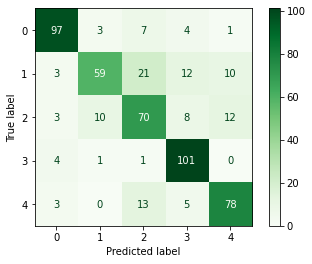

In [9]:
y_pred = search_results.predict(X_test)
print("The accuracy score is: " + str(accuracy_score(y_pred, y_test)))
print("Best params: " + str(search_results.best_params_))

knn_confusion_matrix = confusion_matrix(y_test, search_results.predict(X_test))
display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix)
display.plot(cmap = 'Greens')
plt.show()